In [1]:
from bs4 import BeautifulSoup as bs
import requests
import re
from splinter import Browser
import pandas as pd
import itertools

In [2]:
#Define Executable Path for ChromeDriver to use for web scraping

executable_path = {'executable_path': '/usr/local/bin/chromedriver'}
browser = Browser('chrome', **executable_path, headless=False)

In [3]:
# Define base endpoint URL. Other url's will be built off this endpoint.

baseball_reference_main = 'https://www.baseball-reference.com'
nats_roster_endpoint = '/teams/WSN/2021-roster.shtml'
nats_roster_page = baseball_reference_main + nats_roster_endpoint
browser.visit(nats_roster_page)

<html class="js cookies localstorage sessionstorage cors history csspositionsticky no-touchevents pointerevents matchmedia flexwrap desktop is_live" data-root="/home/br/build" data-version="klecko-" itemscope="" itemtype="https://schema.org/WebSite" lang="en" style=""><head><script src="https://cdn.krxd.net/userdata/get?pub=9427dd0d-835c-471c-a5db-ab01ae8a681c&amp;technographics=1&amp;callback=Krux.ns.investingchannelinc.kxjsonp_userdata" type="text/javascript"></script><script src="https://beacon.krxd.net/optout_check?callback=Krux.ns.investingchannelinc.kxjsonp_optOutCheck" type="text/javascript"></script><script async="" src="https://static.criteo.net/js/ld/publishertag.prebid.js" type="text/javascript"></script><script src="https://consumer.krxd.net/consent/get/9427dd0d-835c-471c-a5db-ab01ae8a681c?idt=device&amp;dt=kxcookie&amp;callback=Krux.ns.investingchannelinc.kxjsonp_consent_get_0" type="text/javascript"></script><script src="https://partner.googleadservices.com/gampad/cookie.
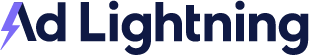

In [4]:
#Use Beautiful Soup HTML.parser to extract relvant details about news articles

roster_html = browser.html
roster_soup = bs(roster_html, 'html.parser')
roster_soup

In [5]:
all_nats_players_this_season_html = roster_soup.find('table', class_="sortable stats_table shade_zero now_sortable", id="appearances").find('tbody').find_all(attrs={"data-stat": "player"})

In [6]:
active_40_man_df = pd.read_html(nats_roster_page,keep_default_na=False)[0]
active_40_man_df = active_40_man_df[active_40_man_df.Name != 'Name']
active_40_man_df

,Rk,Uni,Name,Unnamed: 3,Unnamed: 4,OnActv,IL,Age,B,T,Ht,Wt,DoB,1stYr
0,1,62,Alberto Baldonado,pa PA,Pitcher,*,,28,L,L,"6' 4""",250,"Feb 1, 1993",2010
1,2,67,Kyle Finnegan,us US,Pitcher,*,,29,R,R,"6' 2""",200,"Sep 4, 1991",2011
2,3,40,Josiah Gray,us US,Pitcher,*,,23,R,R,"6' 1""",190,"Dec 21, 1997",2016
3,4,71,Mason Thompson,us US,Pitcher,*,,23,R,R,"6' 7""",223,"Feb 20, 1998",2016
4,5,30,Paolo Espino,pa PA,Pitcher,*,,34,R,R,"5' 10""",215,"Jan 10, 1987",2007
5,6,46,Patrick Corbin,us US,Pitcher,*,,31,L,L,"6' 4""",220,"Jul 19, 1989",2009
6,7,52,Patrick Murphy,us US,Pitcher,*,,26,R,R,"6' 5""",235,"Jun 10, 1995",2014
7,8,73,Jhon Romero,co CO,Pitcher,*,,26,R,R,"5' 10""",195,"Jan 17, 1995",2015
8,9,33,Ryne Harper,us US,Pitcher,*,,32,R,R,"6' 3""",217,"Mar 27, 1989",2011
9,10,23,Erick Fedde,us US,Pitcher,*,,28,R,R,"6' 4""",200,"Feb 25, 1993",2012


In [7]:
non_40_man_df = pd.read_html(nats_roster_page,keep_default_na=False)[1]
non_40_man_df

,Name,Age,Unnamed: 2,B,T,Ht,Wt,DoB,Yrs,G,...,LF,CF,RF,OF,DH,PH,PR,WAR,Salary,Unnamed: 28
0,Riley Adams,25,us US,R,R,"6' 4""",246,"Jun 26, 1996",1st,34,...,0,0,0,0,0,10,2,0.9,,
1,Humberto Arteaga,27,ve VE,R,R,"6' 1""",160,"Jan 23, 1994",2,1,...,0,0,0,0,0,0,0,-0.1,,
2,Alex Avila,34,us US,L,R,"5' 11""",228,"Jan 29, 1987",13,33,...,0,0,0,0,0,6,0,0.7,,
3,Luis Avilan,31,ve VE,L,L,"6' 2""",220,"Jul 19, 1989",10,4,...,0,0,0,0,0,0,0,-0.3,,
4,Alberto Baldonado,28,pa PA,L,L,"6' 4""",250,"Feb 1, 1993",1st,14,...,0,0,0,0,0,0,0,-0.5,,
5,Tres Barrera,26,us US,R,R,"6' 0""",206,"Sep 15, 1994",2,30,...,0,0,0,0,0,1,0,0.5,,
6,Josh Bell,28,us US,B,R,"6' 4""",255,"Aug 14, 1992",6,143,...,8,0,1,9,5,17,0,3.1,"$6,350,000",
7,Starlin Castro,31,do DO,R,R,"6' 2""",218,"Mar 24, 1990",12,87,...,0,0,0,0,0,2,0,1.1,"$7,000,000",
8,Sam Clay,28,us US,L,L,"6' 3""",227,"Jun 21, 1993",1st,58,...,0,0,0,0,0,0,0,-0.7,,
9,Patrick Corbin,31,us US,L,L,"6' 4""",220,"Jul 19, 1989",9,31,...,0,0,0,0,0,0,0,-1.1,"$24,416,667",


In [9]:
all_season_roster = active_40_man_df.merge(non_40_man_df, on='Name', how='outer')
all_season_roster

,Rk,Uni,Name,Unnamed: 3,Unnamed: 4,OnActv,IL,Age_x,B_x,T_x,...,LF,CF,RF,OF,DH,PH,PR,WAR,Salary,Unnamed: 28
0,1,62,Alberto Baldonado,pa PA,Pitcher,*,,28,L,L,...,0,0,0,0,0,0,0,-0.5,,
1,2,67,Kyle Finnegan,us US,Pitcher,*,,29,R,R,...,0,0,0,0,0,0,0,-0.4,,
2,3,40,Josiah Gray,us US,Pitcher,*,,23,R,R,...,0,0,0,0,0,0,0,-0.3,,
3,4,71,Mason Thompson,us US,Pitcher,*,,23,R,R,...,0,0,0,0,0,0,0,-0.2,,
4,5,30,Paolo Espino,pa PA,Pitcher,*,,34,R,R,...,0,0,0,0,0,0,0,1.1,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,NaN,NaN,Max Scherzer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,2.8,"$34,503,480",All-Star
62,NaN,NaN,Kyle Schwarber,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,72,0,0,72,0,0,0,1.8,"$7,000,000",All-Star
63,NaN,NaN,Trea Turner,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,4.0,"$13,000,000",All-Star
64,NaN,NaN,Cody Wilson,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0.0,,


In [10]:
all_season_roster_list = all_season_roster['Name'].to_list()
all_season_roster_list.remove('Name')
print(all_season_roster_list)

['Alberto Baldonado', 'Kyle Finnegan', 'Josiah Gray', 'Mason Thompson', 'Paolo Espino', 'Patrick Corbin', 'Patrick Murphy', 'Jhon Romero', 'Ryne Harper', 'Erick Fedde', 'Sean Nolin', 'Austin Voth', 'Tanner Rainey', 'Andres Machado', 'Ryan Zimmerman', 'Riley Adams', 'Luis Garcia', 'Yadiel Hernández', 'Lane Thomas', 'Alcides Escobar', 'Juan Soto', 'Carter Kieboom', 'Josh Bell', 'Alex Avila', 'Jordy Mercer', 'Andrew Stevenson', 'Keibert Ruiz', 'Gerardo Parra', 'Josh Rogers', 'Joe Ross', 'Stephen Strasburg', 'Will Harris', 'Luis Avilan', 'Kyle McGowin', 'Wander Suero', 'Gabe Klobosits', 'Steven Fuentes', 'Seth Romero', 'Sam Clay', 'Gerardo Carrillo', 'Joan Adon', 'Tres Barrera', 'Victor Robles', 'Mike Ford', 'Yasel Antuna', 'Humberto Arteaga', 'Starlin Castro', 'Yan Gomes', 'Javy Guerra', 'Brad Hand', 'Josh Harrison', 'Daniel Hudson', 'Jon Lester', 'Kyle Lobstein', 'Jonathan Lucroy', 'Justin Miller', 'Hernan Perez', 'Jakson Reetz', 'Rene Rivera', 'Jefry Rodriguez', 'Adrian Sanchez', 'Max S

In [11]:
player_info_all = []
limit = 100
for index, player in enumerate(all_season_roster_list):
    if index == limit:
        break
    try:
        player_info_dub_test = []
        player_source_tag = roster_soup.find("a", string=player)
        player_url_endpoint = player_source_tag['href']
        player_profile = baseball_reference_main + player_url_endpoint

        #Attribute 1 & 2: PlayerID & Full Name. PlayerID to be mapped and .loc function incorporated to avoid duplicates
        first_last_name_split = player.split(" ")
        first_name_char_used = first_last_name_split[0][:3].lower()
        last_name_char_used = first_last_name_split[1][:4].lower()
        unique_id = last_name_char_used + first_name_char_used + '01'
        player_info_dub_test.append(unique_id)
        player_info_dub_test.append(player)
        print(f'playerID: {unique_id}')
        print(f'playerName: {player}')

        browser.visit(player_profile)
        profile_html = browser.html
        profile_soup = bs(profile_html, 'html.parser')
        attribute_finder = profile_soup.find('div',class_='players').find(attrs={"itemtype":"https://schema.org/Person"})

        #Attribute 3: Team Name. To be converted to TEAM ID
        try:
            team_string_header = attribute_finder.find(string='Team:').find_parent('p')
            player_team_main = team_string_header.a.text
            player_info_dub_test.append(player_team_main)
            print(f'TeamName: {player_team_main}')

            player_team_level_parenthesis = team_string_header.contents[-1]
            start_grouping = player_team_level_parenthesis.find("(") + len("(")
            end_grouping = player_team_level_parenthesis.find(")")
            org_injury_info = player_team_level_parenthesis[start_grouping:end_grouping]
            org_injury_list = org_injury_info.split(",")
            injury_info = org_injury_list[-1]

            #Attribute 4 & 5: 25man and 40man flags to determine if player is in majors or 40 man roster
            if "majors" in org_injury_list:
                print('25man: 1')
                print('40man: 1')
                player_info_dub_test.append(1)
                player_info_dub_test.append(1)
            elif "40-man" in org_injury_list:
                print('25man: 0')
                print('40man: 1')
                player_info_dub_test.append(0)
                player_info_dub_test.append(1)
            else:
                print('25man: 0')
                print('40man: 0')
                player_info_dub_test.append(0)
                player_info_dub_test.append(0)

            #Attribute 6: Injury Status
            if "IL" in injury_info:
                duration_split = injury_info.split('-')
                duration_IL = duration_split[0].strip()
                print(f'injuryStatus: {duration_IL}')
                player_info_dub_test.append(duration_IL)
            else:
                print(f'injuryStatus: Null')
                player_info_dub_test.append(None)
        except AttributeError:
            print('TeamName: Null')
            print('25man: Null')
            print('40man: Null')
            print('injuryStatus: Null')
            player_info_dub_test.append(None)
            player_info_dub_test.append(None)
            player_info_dub_test.append(None)
            player_info_dub_test.append(None)

        #Attribute 7,8,9: Position, Bats, Throws. May need to write code to convert "Right" to "R"
        pos_key_value = attribute_finder.find(string=re.compile('Position')).find_parent('p')
        position_attribute = pos_key_value.text.split(':')[-1].strip()
        print(f'posPrimary: {position_attribute}')
        player_info_dub_test.append(position_attribute)

        bat_throw_key_value = attribute_finder.find(string='Bats: ').find_parent('p').text.split('•')
        bat_value = bat_throw_key_value[0].split(':')[-1].strip()
        throw_value = bat_throw_key_value[1].split(':')[-1].strip()
        print(f'Bats: {bat_value}')
        print(f'Throws: {throw_value}')
        player_info_dub_test.append(bat_value)
        player_info_dub_test.append(throw_value)

        #Attribute 10 & 11: Height & Weight
        height_ft_inch_value = attribute_finder.find(attrs={"itemprop":"height"}).text
        height_split = height_ft_inch_value.split('-')
        height_total_inches = int(height_split[0])*12 + int(height_split[1])
        print(f'Height: {height_total_inches} inches')
        player_info_dub_test.append(height_total_inches)

        weight_value = attribute_finder.find(attrs={"itemprop":"weight"}).text.replace('lb','')
        print(f'Weight: {weight_value} lbs')
        player_info_dub_test.append(weight_value)

        #Attribute 12: Date Of Birth
        dateOfBirth = attribute_finder.find(string='Born:').find_parent('p').find(attrs={"itemprop":"birthDate"}).text.strip()
        print(f'dateOfBirth: {dateOfBirth}')
        player_info_dub_test.append(dateOfBirth)

        #Attribute 13: Service Time
        try:
            serviceTime = attribute_finder.find(string=re.compile('Service')).find_parent('p').text.split('•')[0].split(':')[1].strip()
            print(f'serviceTime:{serviceTime}')
            player_info_dub_test.append(serviceTime)
        except AttributeError:
            serviceTime = '0.00'
            print(f'serviceTime:{serviceTime}')
            player_info_dub_test.append(serviceTime)

        #Attribute 14: Image URL    
        try:
            player_image_tag = profile_soup.find('div', id = 'info').find('div',class_ = 'media-item multiple').img['src']
            print(f'playerImgURL: {player_image_tag}')
            player_info_dub_test.append(player_image_tag)
        except AttributeError:
            print(f'playerImgURL: Null')
            player_info_dub_test.append(None)
            

        #         if player in non_forty_guys_names:
        #             player_source_tag = roster_soup.find("a", string=player)
        #             player_url_endpoint = player_source_tag['href']
        #             player_profile = baseball_reference_main + player_url_endpoint
        #             print(player)
        #             browser.visit(player_profile)
        #             profile_html = browser.html
        #             profile_soup = bs(profile_html, 'html.parser')
        #             player_image_tag = profile_soup.find('div', id = 'info').find('div',class_ = 'media-item multiple').img['src']
        #             print(player_image_tag)
        #             all_player_images.append(player_image_tag)
        #             try:
        #                 team_string_header = profile_soup.find('div',class_='players').find(attrs={"itemtype":"https://schema.org/Person"}).find(string='Team:')
        #                 team_parent = team_string_header.find_parent('p').a.text
        #                 print(team_parent) 
        #                 if team_parent == 'Washington Nationals':
        #                     team_list_non40_names.append(player)
        #                 else:
        #                     pass
        #             except AttributeError:
        #                 print('Free Agent or Released')
        #         elif player in all_season_roster_list:
        #             player_source_tag = roster_soup.find("a", string=player)
        #             player_url_endpoint = player_source_tag['href']
        #             player_profile = baseball_reference_main + player_url_endpoint
        #             print(player)
        #             browser.visit(player_profile)
        #             profile_html = browser.html
        #             profile_soup = bs(profile_html, 'html.parser')
        #             player_image_tag = profile_soup.find('div', id = 'info').find('div',class_ = 'media-item multiple').img['src']
        #             all_player_images.append(player_image_tag)
        #             print(player_image_tag)
        #             print('Washington Nationals')
        #         else:
        #             all_player_images.append('Placeholder. Possible Error')
        print(player_info_dub_test)
        player_info_all.append(player_info_dub_test)
        print('----------------------')
    except None:
        print('attributeNotFound')

playerID: baldalb01
playerName: Alberto Baldonado
TeamName: Washington Nationals
25man: 1
40man: 1
injuryStatus: Null
posPrimary: Pitcher
Bats: Left
Throws: Left
Height: 76 inches
Weight: 250 lbs
dateOfBirth: February 1, 1993
serviceTime:0.00
playerImgURL: https://www.baseball-reference.com/req/202108020/images/headshots/c/c4eaf70d_mlbam.jpg
['baldalb01', 'Alberto Baldonado', 'Washington Nationals', 1, 1, None, 'Pitcher', 'Left', 'Left', 76, '250', 'February 1, 1993', '0.00', 'https://www.baseball-reference.com/req/202108020/images/headshots/c/c4eaf70d_mlbam.jpg']
----------------------
playerID: finnkyl01
playerName: Kyle Finnegan
TeamName: Washington Nationals
25man: 1
40man: 1
injuryStatus: Null
posPrimary: Pitcher
Bats: Right
Throws: Right
Height: 74 inches
Weight: 200 lbs
dateOfBirth: September 4, 1991
serviceTime:1.000
playerImgURL: https://www.baseball-reference.com/req/202108020/images/headshots/5/56ba1da7_mlbam.jpg
['finnkyl01', 'Kyle Finnegan', 'Washington Nationals', 1, 1, N

TeamName: Washington Nationals
25man: 1
40man: 1
injuryStatus: Null
posPrimary: Catcher and Pinch Hitter
Bats: Right
Throws: Right
Height: 76 inches
Weight: 246 lbs
dateOfBirth: June 26, 1996
serviceTime:0.00
playerImgURL: https://www.baseball-reference.com/req/202108020/images/headshots/5/5c1c52b0_mlbam.jpg
['adamril01', 'Riley Adams', 'Washington Nationals', 1, 1, None, 'Catcher and Pinch Hitter', 'Right', 'Right', 76, '246', 'June 26, 1996', '0.00', 'https://www.baseball-reference.com/req/202108020/images/headshots/5/5c1c52b0_mlbam.jpg']
----------------------
playerID: garclui01
playerName: Luis Garcia
TeamName: Washington Nationals
25man: 1
40man: 1
injuryStatus: Null
posPrimary: Second Baseman and Shortstop
Bats: Left
Throws: Right
Height: 74 inches
Weight: 224 lbs
dateOfBirth: May 16, 2000
serviceTime:0.125
playerImgURL: https://www.baseball-reference.com/req/202108020/images/headshots/4/4b862729_mlbam.jpg
['garclui01', 'Luis Garcia', 'Washington Nationals', 1, 1, None, 'Second 

TeamName: Washington Nationals
25man: 1
40man: 1
injuryStatus: 60
posPrimary: Pitcher
Bats: Right
Throws: Right
Height: 76 inches
Weight: 223 lbs
dateOfBirth: May 21, 1993
serviceTime:4.018
playerImgURL: https://www.baseball-reference.com/req/202108020/images/headshots/b/b625756d_mlbam.jpg
['rossjoe01', 'Joe Ross', 'Washington Nationals', 1, 1, '60', 'Pitcher', 'Right', 'Right', 76, '223', 'May 21, 1993', '4.018', 'https://www.baseball-reference.com/req/202108020/images/headshots/b/b625756d_mlbam.jpg']
----------------------
playerID: straste01
playerName: Stephen Strasburg
TeamName: Washington Nationals
25man: 1
40man: 1
injuryStatus: 60
posPrimary: Pitcher
Bats: Right
Throws: Right
Height: 77 inches
Weight: 240 lbs
dateOfBirth: July 20, 1988
serviceTime:10.118
playerImgURL: https://www.baseball-reference.com/req/202108020/images/headshots/1/134bc61f_mlbam.jpg
['straste01', 'Stephen Strasburg', 'Washington Nationals', 1, 1, '60', 'Pitcher', 'Right', 'Right', 77, '240', 'July 20, 1988'

TeamName: Washington Nationals
25man: 0
40man: 0
injuryStatus: Null
posPrimary: First Baseman
Bats: Left
Throws: Right
Height: 72 inches
Weight: 225 lbs
dateOfBirth: July 4, 1992
serviceTime:1.061
playerImgURL: https://www.baseball-reference.com/req/202108020/images/headshots/e/ee192a64_mlbam.jpg
['fordmik01', 'Mike Ford', 'Washington Nationals', 0, 0, None, 'First Baseman', 'Left', 'Right', 72, '225', 'July 4, 1992', '1.061', 'https://www.baseball-reference.com/req/202108020/images/headshots/e/ee192a64_mlbam.jpg']
----------------------
playerID: antuyas01
playerName: Yasel Antuna
TeamName: Washington Nationals
25man: 0
40man: 0
injuryStatus: Null
posPrimary: Shortstop, Third Baseman and Second Baseman
Bats: Both
Throws: Right
Height: 72 inches
Weight: 195 lbs
dateOfBirth: October 26, 1999
serviceTime:0.00
playerImgURL: https://www.baseball-reference.com/req/202108020/images/headshots/a/a1539cab_mlbam.jpg
['antuyas01', 'Yasel Antuna', 'Washington Nationals', 0, 0, None, 'Shortstop, Th

TeamName: Washington Nationals
25man: 0
40man: 0
injuryStatus: Null
posPrimary: Pinch Hitter and Catcher
Bats: Right
Throws: Right
Height: 72 inches
Weight: 205 lbs
dateOfBirth: January 3, 1996
serviceTime:0.00
playerImgURL: https://www.baseball-reference.com/req/202108020/images/headshots/7/740e5f57_mlbam.jpg
['reetjak01', 'Jakson Reetz', 'Washington Nationals', 0, 0, None, 'Pinch Hitter and Catcher', 'Right', 'Right', 72, '205', 'January 3, 1996', '0.00', 'https://www.baseball-reference.com/req/202108020/images/headshots/7/740e5f57_mlbam.jpg']
----------------------
playerID: riveren01
playerName: Rene Rivera
TeamName: Null
25man: Null
40man: Null
injuryStatus: Null
posPrimary: Catcher
Bats: Right
Throws: Right
Height: 70 inches
Weight: 215 lbs
dateOfBirth: July 31, 1983
serviceTime:8.107
playerImgURL: https://www.baseball-reference.com/req/202108020/images/headshots/b/b09b2edb_mlbam.jpg
['riveren01', 'Rene Rivera', None, None, None, None, 'Catcher', 'Right', 'Right', 70, '215', 'Jul

In [12]:
pdf_columns = ['playerID','playerName', 'teamID','majorsFlag','fortyManFlag','injuryStatus','positions','bats','throws',
               'height','weight','dateOfBirth','serviceTime','imgUrl']

In [46]:
player_lc_df = pd.DataFrame(player_info_all,columns = pdf_columns)
player_lc_df

,playerID,playerName,teamID,majorsFlag,fortyManFlag,injuryStatus,positions,bats,throws,height,weight,dateOfBirth,serviceTime,imgUrl
0,baldalb01,Alberto Baldonado,Washington Nationals,1.0,1.0,None,Pitcher,Left,Left,76,250,"February 1, 1993",0.00,https://www.baseball-reference.com/req/2021080...
1,finnkyl01,Kyle Finnegan,Washington Nationals,1.0,1.0,None,Pitcher,Right,Right,74,200,"September 4, 1991",1.000,https://www.baseball-reference.com/req/2021080...
2,grayjos01,Josiah Gray,Washington Nationals,1.0,1.0,None,Pitcher,Right,Right,73,190,"December 21, 1997",0.00,https://www.baseball-reference.com/req/2021080...
3,thommas01,Mason Thompson,Washington Nationals,1.0,1.0,None,Pitcher,Right,Right,79,223,"February 20, 1998",0.00,https://www.baseball-reference.com/req/2021080...
4,espipao01,Paolo Espino,Washington Nationals,1.0,1.0,None,Pitcher,Right,Right,70,215,"January 10, 1987",0.078,https://www.baseball-reference.com/req/2021080...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,sancadr01,Adrian Sanchez,Washington Nationals,0.0,0.0,None,"Pinch Hitter, Second Baseman and Third Baseman",Right,Right,72,208,"August 16, 1990",1.083,https://www.baseball-reference.com/req/2021080...
61,schemax01,Max Scherzer,Los Angeles Dodgers,1.0,1.0,None,Pitcher,Right,Right,75,208,"July 27, 1984",12.079,https://www.baseball-reference.com/req/2021080...
62,schwkyl01,Kyle Schwarber,Boston Red Sox,1.0,1.0,None,Leftfielder and Catcher,Left,Right,72,229,"March 5, 1993",5.086,https://www.baseball-reference.com/req/2021080...
63,turntre01,Trea Turner,Los Angeles Dodgers,1.0,1.0,None,"Shortstop, Second Baseman and Centerfielder",Right,Right,74,185,"June 30, 1993",4.135,https://www.baseball-reference.com/req/2021080...


In [47]:
team_df = pd.read_csv('team_name_lookup.csv')
team_df

,team_id,team_abbrev,team_full,league,division
0,1,ARI,Arizona Diamondbacks,NL,WEST
1,2,ATL,Atlanta Braves,NL,EAST
2,3,BAL,Baltimore Orioles,AL,EAST
3,4,BOS,Boston Red Sox,AL,EAST
4,5,CHW,Chicago White Sox,AL,CENTRAL
5,6,CHC,Chicago Cubs,NL,CENTRAL
6,7,CIN,Cinicinnati Reds,NL,CENTRAL
7,8,CLE,Cleveland Indians,AL,CENTRAL
8,9,COL,Colorado Rockies,NL,WEST
9,10,DET,Detroit Tigers,AL,CENTRAL


In [48]:
team_name_list = player_lc_df['teamID'].to_list()
team_name_list

teamId_list = []
for team in team_name_list:
    try:
        team_abbrev = team_df.loc[team_df['team_full'] == team].iloc[0]['team_abbrev']
        print(team_abbrev)
        teamId_list.append(team_abbrev)
    except IndexError:
        print('Null')
        teamId_list.append(None)
        
player_lc_df['teamID'] = teamId_list

WSN
WSN
WSN
WSN
WSN
WSN
WSN
WSN
WSN
WSN
WSN
WSN
WSN
WSN
WSN
WSN
WSN
WSN
WSN
WSN
WSN
WSN
WSN
WSN
WSN
WSN
WSN
WSN
WSN
WSN
WSN
WSN
WSN
WSN
WSN
WSN
WSN
WSN
WSN
WSN
WSN
WSN
WSN
WSN
WSN
WSN
Null
OAK
Null
NYM
OAK
SDP
STL
MIL
Null
STL
Null
WSN
Null
WSN
WSN
LAD
BOS
LAD
WSN


In [49]:
bats_list = player_lc_df['bats'].to_list()
abr_bats_list = []
for bat in bats_list:
    abbrev = bat[0]
    if abbrev in ['R','L','B']:
        pass
    else:
        print('Invalid value')
    abr_bats_list.append(abbrev)
    
player_lc_df['bats'] = abr_bats_list

In [50]:
throws_list = player_lc_df['throws'].to_list()
abr_throws_list = []
for throw in throws_list:
    abbrev = throw[0]
    if abbrev in ['R','L','B']:
        pass
    else:
        print('Invalid value')
    abr_throws_list.append(abbrev)
    
player_lc_df['throws'] = abr_throws_list

In [53]:
player_lc_df

,playerID,playerName,teamID,majorsFlag,fortyManFlag,injuryStatus,positions,bats,throws,height,weight,dateOfBirth,serviceTime,imgUrl
0,baldalb01,Alberto Baldonado,WSN,1.0,1.0,None,Pitcher,L,L,76,250,"February 1, 1993",0.00,https://www.baseball-reference.com/req/2021080...
1,finnkyl01,Kyle Finnegan,WSN,1.0,1.0,None,Pitcher,R,R,74,200,"September 4, 1991",1.000,https://www.baseball-reference.com/req/2021080...
2,grayjos01,Josiah Gray,WSN,1.0,1.0,None,Pitcher,R,R,73,190,"December 21, 1997",0.00,https://www.baseball-reference.com/req/2021080...
3,thommas01,Mason Thompson,WSN,1.0,1.0,None,Pitcher,R,R,79,223,"February 20, 1998",0.00,https://www.baseball-reference.com/req/2021080...
4,espipao01,Paolo Espino,WSN,1.0,1.0,None,Pitcher,R,R,70,215,"January 10, 1987",0.078,https://www.baseball-reference.com/req/2021080...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,sancadr01,Adrian Sanchez,WSN,0.0,0.0,None,"Pinch Hitter, Second Baseman and Third Baseman",R,R,72,208,"August 16, 1990",1.083,https://www.baseball-reference.com/req/2021080...
61,schemax01,Max Scherzer,LAD,1.0,1.0,None,Pitcher,R,R,75,208,"July 27, 1984",12.079,https://www.baseball-reference.com/req/2021080...
62,schwkyl01,Kyle Schwarber,BOS,1.0,1.0,None,Leftfielder and Catcher,L,R,72,229,"March 5, 1993",5.086,https://www.baseball-reference.com/req/2021080...
63,turntre01,Trea Turner,LAD,1.0,1.0,None,"Shortstop, Second Baseman and Centerfielder",R,R,74,185,"June 30, 1993",4.135,https://www.baseball-reference.com/req/2021080...


In [54]:
player_lc_df.to_csv('Washington_Players',index=False)